In [1]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders
from pandas_datareader import data, wb
from pandas_datareader import data, wb

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")




In [3]:
name = input()

Some Data


In [4]:
file_id = input()

dsvb


In [5]:
# year month day

start = datetime.datetime(2019, 1, 9)
end = datetime.datetime(2020, 4, 12)

In [6]:
# https://uk.finance.yahoo.com/most-active

In [7]:
# DATA = data.DataReader("WALMEX.MX", 'yahoo', start, end)
# DATA = data.DataReader("AMZN", 'yahoo', start, end)
DATA = data.DataReader("BTC-USD", 'yahoo', start, end)
# DATA = data.DataReader("DIS", 'yahoo', start, end)#disney
# DATA = data.DataReader("GOLD", 'yahoo', start, end)#Gold
# DATA = data.DataReader("LLOY.L", 'yahoo', start, end)#Lloyds
# DATA = data.DataReader("NFLX", 'yahoo', start, end)#netflix
# DATA = data.DataReader("MSFT", 'yahoo', start, end)#microsoft
# DATA = data.DataReader("GOOG", 'yahoo', start, end)#google
# DATA = data.DataReader("JPM", 'yahoo', start, end)#JPM
# DATA = data.DataReader("ICON.L", 'yahoo', start, end)#Iconic Lads
# DATA = data.DataReader("88E.L", 'yahoo', start, end)#88E
# DATA = data.DataReader("ASC.L", 'yahoo', start, end)#IASOS - USING #####################################<<<<<<
# DATA = data.DataReader("WTB.L", 'yahoo', start, end)#Whitbread
# DATA = data.DataReader("OXB.L", 'yahoo', start, end)#Oxford_biomedica - not on etoro
# DATA = data.DataReader("SSE.L", 'yahoo', start, end)#SSE plc
# DATA = data.DataReader("NCYT.L", 'yahoo', start, end)#Novacyt S.A
# DATA = data.DataReader("GAW.L", 'yahoo', start, end)#GAMES WORKSHOP - USING #####################################<<<<<<
# DATA = data.DataReader("AVV.L", 'yahoo', start, end)#AVEVA GROUP 
# DATA = data.DataReader("SMWH.L", 'yahoo', start, end)#WH SMITH - USING #####################################<<<<<<
# DATA = data.DataReader("OTB.L", 'yahoo', start, end)#ON THE BEACH GROUP - 
# DATA = data.DataReader("SBRY.L", 'yahoo', start, end)#SAINSBURY - 
# DATA = data.DataReader("BA.L", 'yahoo', start, end)#BAE_SYS - 
# DATA = data.DataReader("RR.L", 'yahoo', start, end)#ROLLS_ROYCE - 
# DATA = data.DataReader("VMUK.L", 'yahoo', start, end)#VIRGIN MONEY - 
# DATA = data.DataReader("NXT.L", 'yahoo', start, end)#next -
# DATA = data.DataReader("WMT", 'yahoo', start, end)#next -
# DATA = data.DataReader("MDT", 'yahoo', start, end)#medtronic-
# DATA = data.DataReader("AZN.L", 'yahoo', start, end)#astrazenica-
# DATA = data.DataReader("^GSPC", 'yahoo', start, end)#spx500


# Corona Pharma
# DATA = data.DataReader("JNJ", 'yahoo', start, end)#J&J
# DATA = data.DataReader("PFE", 'yahoo', start, end)#Pfizer Inc.
# DATA = data.DataReader("ABBV", 'yahoo', start, end)#AbbVie Inc.
# DATA = data.DataReader("SNY", 'yahoo', start, end)#Sanofi
# DATA = data.DataReader("GSK", 'yahoo', start, end)#GlaxoSmithKline plc
# DATA = data.DataReader("GILD", 'yahoo', start, end)#Gilead Sciences, Inc.
# DATA = data.DataReader("REGN", 'yahoo', start, end)#Regeneron Pharmaceuticals, Inc.
# DATA = data.DataReader("TAK", 'yahoo', start, end)#Takeda Pharmaceutical Company Limited
# DATA = data.DataReader("BNTX", 'yahoo', start, end)#BioNTech SE
# DATA = data.DataReader("MRNA", 'yahoo', start, end)#Moderna, Inc.
# DATA = data.DataReader("VIR", 'yahoo', start, end)#Vir Biotechnology, Inc.
# DATA = data.DataReader("INO", 'yahoo', start, end)#Inovio Pharmaceuticals, Inc.
# DATA = data.DataReader("NVAX", 'yahoo', start, end)#Novav


# DATA = data.DataReader("UNM", 'yahoo', start, end)#Unum Group American insurance for health 
# DATA = data.DataReader("SYF", 'yahoo', start, end)#Synchrony Financial SYF 
# DATA = data.DataReader("DFS", 'yahoo', start, end)#Discover Financial Services

# Assurant Inc. (AIZ)
# Progressive Corp. (PGR)
# Chubb Ltd. (CB)


# MSCI Inc. (MSCI) 
# MarketAxess Holdings Inc. (MKTX)
# The Western Union Co (WU)
# S&P 500
# Financial Select Sector SPDR Fund (XLF)

In [8]:
DATA

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-09,4068.403564,4022.662842,4031.552002,4035.296387,5.115905e+09,4035.296387
2019-01-10,4064.066650,3659.174561,4034.411377,3678.924561,6.874144e+09,3678.924561
2019-01-11,3713.881836,3653.069824,3674.015381,3687.365479,5.538713e+09,3687.365479
2019-01-12,3698.978271,3653.810791,3686.973145,3661.301025,4.778171e+09,3661.301025
2019-01-13,3674.760010,3544.927246,3658.868164,3552.953125,4.681302e+09,3552.953125
...,...,...,...,...,...,...
2020-04-05,7271.781250,6782.889648,6788.049805,7271.781250,4.689690e+10,7271.781250
2020-04-06,7427.939453,7136.714355,7273.644043,7176.414551,4.424348e+10,7176.414551
2020-04-07,7356.223633,7153.305664,7179.283203,7334.098633,3.756325e+10,7334.098633


In [9]:
DATA.to_csv('My_Data/yahoo_data_{}{}.csv'.format(name,file_id))
df = pd.read_csv('My_Data/yahoo_data_{}{}.csv'.format(name,file_id),index_col='Date',parse_dates=True)
# df2.index.freq='MS'
# df2 = df2[4400:]  # we only want the first four months

# df2.asfreq(freq='C')
df = df.resample(rule='D').mean()
df = df.fillna(method='ffill')

In [10]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,460.000000,460.000000,460.000000,460.000000,4.600000e+02,460.000000
mean,7795.515106,7452.726675,7625.134399,7633.113141,2.142491e+10,7633.113141
std,2483.122008,2332.119545,2415.373969,2410.643961,1.127758e+10,2410.643961
min,3427.945557,3391.023682,3401.376465,3399.471680,4.681302e+09,3399.471680
25%,5631.658325,5274.542480,5395.831665,5401.864258,1.379623e+10,5401.864258
50%,8197.218262,7842.871826,8035.018311,8040.744385,1.906743e+10,8040.744385
75%,9685.794189,9278.356201,9509.946289,9512.436523,2.786130e+10,9512.436523
max,13796.489258,12233.261719,13017.125000,13016.231445,7.415677e+10,13016.231445


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460 entries, 2019-01-09 to 2020-04-12
Freq: D
Data columns (total 6 columns):
High         460 non-null float64
Low          460 non-null float64
Open         460 non-null float64
Close        460 non-null float64
Volume       460 non-null float64
Adj Close    460 non-null float64
dtypes: float64(6)
memory usage: 25.2 KB


In [12]:
# Check If stationary function at top!
adf_test(df['Close'],title='Checked Data')

Augmented Dickey-Fuller Test: Checked Data
ADF test statistic       -1.850181
p-value                   0.355848
# lags used               1.000000
# observations          458.000000
critical value (1%)      -3.444709
critical value (5%)      -2.867871
critical value (10%)     -2.570142
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [13]:
# CHECK CAUSALITY with other data if required
# The function takes in a 2D array [y,x] and a maximum number of lags to test on x. Here our y is column 'a' and x is column 'd'. We'll set maxlags to 3.

# grangercausalitytests(df3[['a','d']],maxlag=3);

In [14]:
# Check Sesonality

In [15]:
# from statsmodels.graphics.tsaplots import month_plot,quarter_plot

# Note: add a semicolon to prevent two plots being displayed in jupyter
# dfq = df['Close'].resample(rule='Q').mean()

# quarter_plot(dfq);

# Data Plot

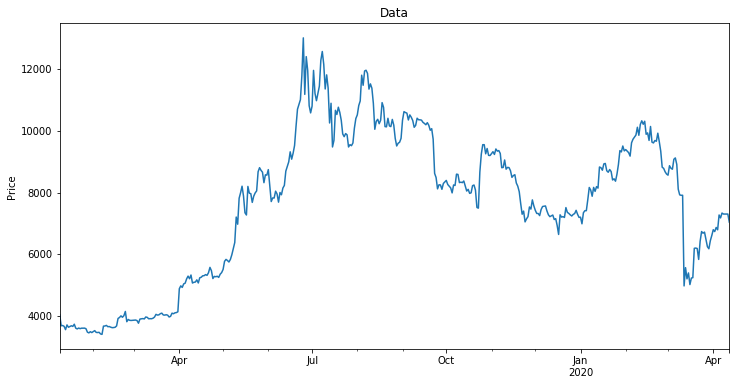

In [16]:
title = 'Data'
ylabel='Price'
xlabel='' 

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### ETS Decomposition

<Figure size 432x288 with 0 Axes>

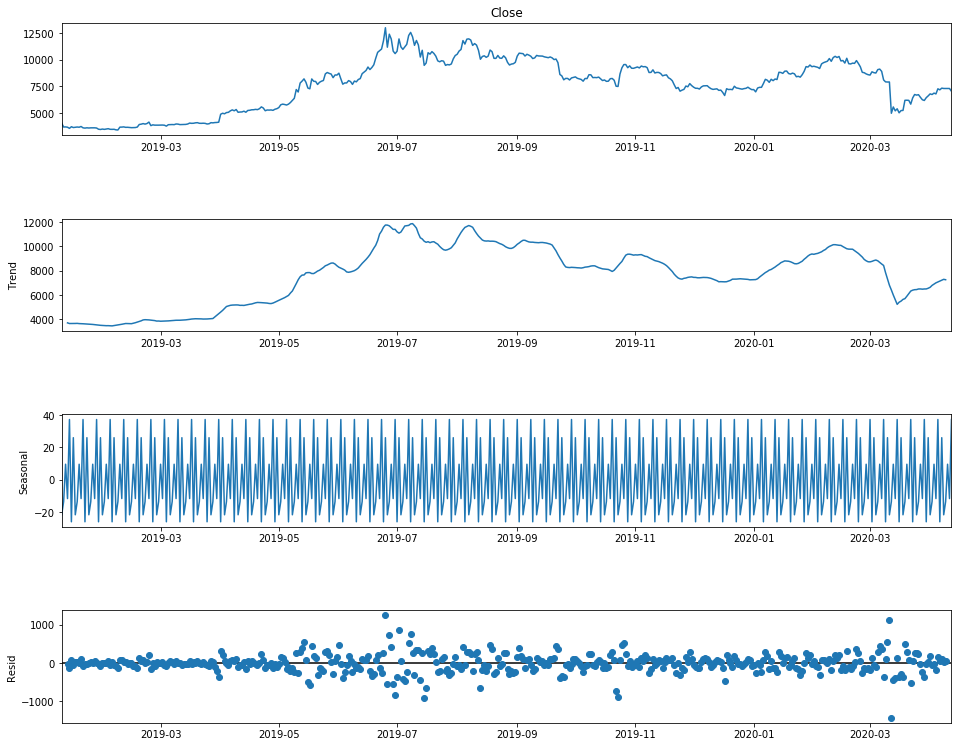

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt  # Matlab-style plotting

result = seasonal_decompose(df['Close'], model='add')

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [18]:
# For SARIMA Orders we set seasonal=True and pass in an m value

auto_arima(df['Close'],seasonal=True,m=7,trace=True).summary() 
# help(auto_arima)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(1, 0, 1, 7) (constant=True); AIC=6651.531, BIC=6684.564, Time=1.045 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 7) (constant=True); AIC=6650.699, BIC=6658.957, Time=0.010 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 7) (constant=True); AIC=6650.465, BIC=6666.981, Time=0.057 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 7) (constant=True); AIC=6650.669, BIC=6667.186, Time=0.054 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 7) (constant=False); AIC=6648.872, BIC=6653.002, Time=0.006 seconds
Fit ARIMA: (0, 1, 0)x(1, 0, 0, 7) (constant=True); AIC=6652.629, BIC=6665.016, Time=0.031 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 1, 7) (constant=True); AIC=6652.634, BIC=6665.022, Time=0.038 seconds
Fit ARIMA: (0, 1, 0)x(1, 0, 1, 7) (constant=True); AIC=6652.200, BIC=6668.716, Time=0.351 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 7) (constant=True); AIC=6648.666, BIC=6661.053, Time=0.021 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 1, 7) (constant=True); AIC=6650.481, BIC=6666.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  460
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -3321.333
Date:                Sun, 12 Apr 2020   AIC                           6648.666
Time:                        19:40:59   BIC                           6661.053
Sample:                             0   HQIC                          6653.544
                                - 460                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.9860     16.926      0.472      0.637     -25.189      41.161
ar.L1         -0.0935      0.029     -3.243      0.001      -0.150      -0.037
sigma2      1.129e+05   2674.748     42.211      0.000    1.08e+05    1.18e+05
===================================================================================
Ljung-Box (Q):                       45.39   Jarque-Bera (JB):              5145.56
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               2.88   Skew:                            -1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
len(df)

460

In [20]:
# Set one year for testing
train = df.iloc[:450]
test = df.iloc[450:]

### Fit a SARIMA Model

In [21]:
# model = SARIMAX(train['Close'],order=(1,1,0))
model = SARIMAX(train['Close'],order=(1,1,0),seasonal_order=(0,1,0,7))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                  450
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 7)   Log Likelihood               -3360.913
Date:                           Sun, 12 Apr 2020   AIC                           6725.826
Time:                                   19:40:59   BIC                           6734.009
Sample:                               01-09-2019   HQIC                          6729.054
                                    - 04-02-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0463      0.040     -1.154      0.249      -0.125       0.032
sigma2      2.359e+05   5463.834     43.166      0.000    2.25e+05    2.47e+05
===================================================================================
Ljung-Box (Q):                      185.08   Jarque-Bera (JB):              4091.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.34   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1



#Run this a few times is it doesnt look right then change levels section
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

For more information on these arguments visit https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [23]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Close'][i]}")

predicted=6491.171083, expected=6867.52734375
predicted=6263.361714, expected=6791.12939453125
predicted=6197.119733, expected=7271.78125
predicted=6459.821443, expected=7176.41455078125
predicted=6627.953299, expected=7334.0986328125
predicted=6814.801442, expected=7302.08935546875
predicted=6754.564138, expected=7302.08935546875
predicted=6512.348013, expected=7302.08935546875
predicted=6284.538645, expected=7302.08935546875
predicted=6218.296664, expected=7039.56103515625


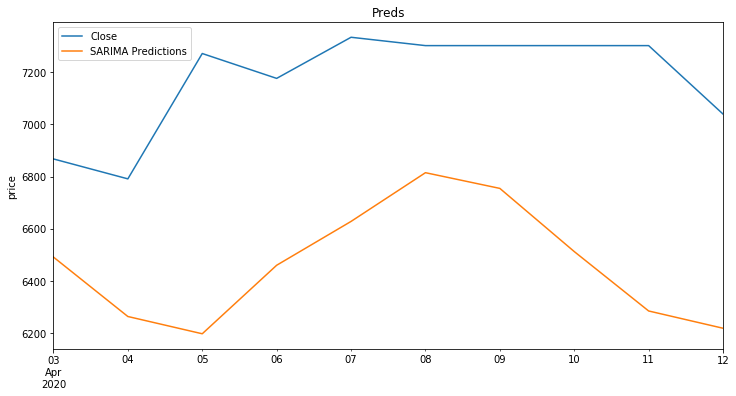

In [24]:
# Plot predictions against known values
title = 'Preds'
ylabel='price'
xlabel=''

ax = test['Close'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Evaluate the Model

In [25]:
percent = pd.DataFrame([test['Close'],predictions]).transpose()
percent['Percent'] = (percent['SARIMA Predictions']/(percent['Close']/100))-100
percent

,Close,SARIMA Predictions,Percent
Date,,,
2020-04-03,6867.527344,6491.171083,-5.480230
2020-04-04,6791.129395,6263.361714,-7.771427
2020-04-05,7271.781250,6197.119733,-14.778518
2020-04-06,7176.414551,6459.821443,-9.985392
2020-04-07,7334.098633,6627.953299,-9.628250
2020-04-08,7302.089355,6814.801442,-6.673267
2020-04-09,7302.089355,6754.564138,-7.498199
2020-04-10,7302.089355,6512.348013,-10.815279
2020-04-11,7302.089355,6284.538645,-13.935062


In [26]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Close'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) MSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) MSE Error: 545803.6428


In [27]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Close'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) RMSE Error: 738.7852481


These are outstanding results!
### Retrain the model on the full data, and forecast the future

In [28]:
# model = SARIMAX(train['Close'],order=(2,2,3))

model = SARIMAX(df['Close'],order=(1,1,0),seasonal_order=(0,1,0,7))

results = model.fit()
fcast = results.predict(len(df),len(df)+8,dynamic=False, typ='levels').rename('SARIMA Forecast')

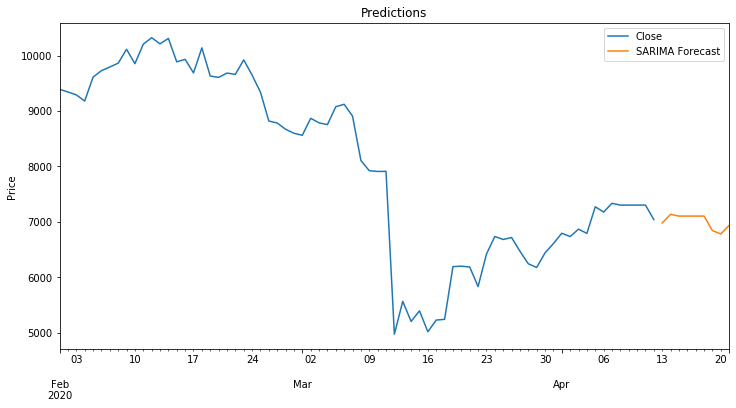

In [29]:
# Plot predictions against known values
title = 'Predictions'
ylabel='Price'
xlabel=''

ax = df['Close']["2020-02-01":].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [30]:
forecast = pd.DataFrame(fcast)
forecast['RMSE'] = error
forecast['Lower Forcast Range TARGET PRICE TO BUY'] = forecast['SARIMA Forecast'] - forecast['RMSE']
forecast['Upper Forcast Range TARGET PRICE TO SELL'] = forecast['SARIMA Forecast'] + forecast['RMSE']

In [31]:
forecast

,SARIMA Forecast,RMSE,Lower Forcast Range TARGET PRICE TO BUY,Upper Forcast Range TARGET PRICE TO SELL
2020-04-13,6979.589977,738.785248,6240.804729,7718.375225
2020-04-14,7135.588261,738.785248,6396.803013,7874.373509
2020-04-15,7103.659274,738.785248,6364.874026,7842.444522
2020-04-16,7103.655450,738.785248,6364.870202,7842.440698
2020-04-17,7103.655632,738.785248,6364.870384,7842.440880
2020-04-18,7103.655623,738.785248,6364.870375,7842.440871
2020-04-19,6841.127303,738.785248,6102.342055,7579.912552
2020-04-20,6781.156245,738.785248,6042.370997,7519.941493
2020-04-21,6937.154530,738.785248,6198.369281,7675.939778
